
# Heart Disease Prediction using Logistic Regression

This Standard Operating Procedure (SOP) outlines the process of building a Logistic Regression model to predict heart disease using a heart disease dataset. We'll explore data collection, processing, model training with hyperparameter tuning, evaluation, and building a basic predictive system.

In this lab , we will :

* Load and pre-process data.
* Train and evaluate a Logistic Regression model for classification.
* Perform hyperparameter tuning.
* Interpret model results and build a simple predictive system.

### Importing Dependencies 


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection and Processing

Here, we'll load the heart disease dataset into a pandas DataFrame. 


In [2]:
# Load heart disease dataset into a pandas dataframe
df = pd.read_csv('heart_disease_data.csv')

In [3]:
# Preview first 5 rows
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Preview first 5 rows
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# no. of rows and columns in the dataset
df.shape

(303, 14)

In [6]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of target variable
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart
0 --> Healthy Heart

Splitting the features and the target

In [10]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [13]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Splitting the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Model Training with Hyperparameter Tuning

We'll use GridSearchCV to find the optimal hyperparameters for the Logistic Regression model. This step involves defining a grid of parameters to search through and evaluating the model's performance on each combination. The best parameters are then chosen based on the specified scoring metric (accuracy in this case).

In [16]:
# Parameter grid for hyperparameter tuning (C: regularization strength, solver: optimization algorithm).

param_grid = {
    'C' : [0.1, 1, 10],
    'solver' : ['liblinear', 'saga']
}

# Perform grid search with 5-fold cross-validation using Logistic Regression.

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


In [17]:
model = grid_search.best_estimator_

In [18]:
# training the Logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

### Model Evaluation

We'll assess the model's performance using various metrics like accuracy score, classification report, and confusion matrix.

* Accuracy score: Measures the proportion of correct predictions.
* Classification report: Provides detailed information about the model's performance for each class (healthy/defective heart).
* Confusion matrix: Visualizes the number of correct and incorrect predictions for each class.

In [19]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

Accuracy score

In [20]:
print('Accuracy on Training data : ', accuracy_score(Y_train, X_train_prediction))
print('Accuracy on Test data : ', accuracy_score(Y_test, X_test_prediction))
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  0.8388429752066116
Accuracy on Test data :  0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



Confusion Matrix

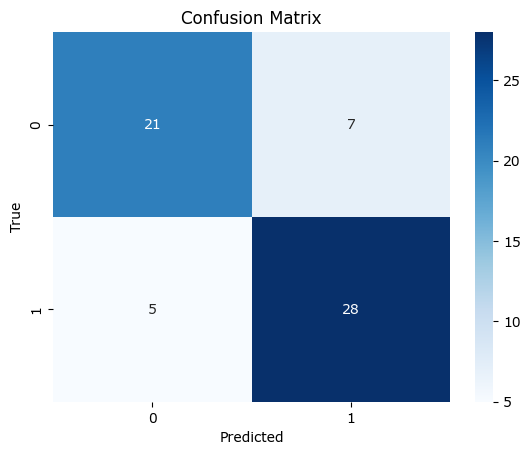

In [21]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Cross Validation

We'll perform cross-validation to estimate the model's generalizability on unseen data. This involves splitting the data into multiple folds, training the model on each fold except one (validation fold), and evaluating its performance on the validation fold. This process is repeated for all folds, and the average performance across all folds provides a more reliable estimate of the model's effectiveness on new data.

In [22]:
cv_scores = cross_val_score(model, X_scaled, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.83606557 0.85245902 0.83606557 0.86666667 0.76666667]
Mean CV Score: 0.831584699453552


### Building a Predictive System

Finally, we'll demonstrate how to use the trained model to make predictions on new data points. This allows us to assess the model's ability to classify unseen instances as having or not having heart disease.

In [23]:
input_data = (54,1,0,140,239,0,1,160,0,1.2,2,0,2)
input_data_as_nparray = np.asarray(input_data).reshape(1, -1)
input_data_scaled = scaler.transform(input_data_as_nparray)
prediction = model.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print("The person does not have a Heart Disease")
else:
    print("The Person has Heart Disease")

[1]
The Person has Heart Disease


c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Thank you for reviewing this notebook!
Want to see more of my work? Head over to my [Github](github.com/rahulvishwakarmax) Profile.